In [4]:
import sys
# sys.path.insert(0, '../../utils')
import pandas as pd
import numpy as np
# from mpl_toolkits import mplot3d
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import Fidelity_Measure as fm
import Purity_Measure as pm
import Concurrence_Measure as cm
import os

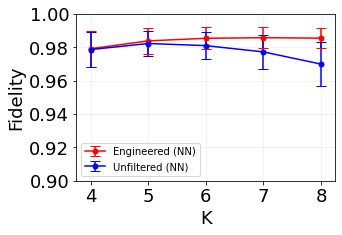

In [5]:
tomo_test, dm_test, dm_mle = pd.read_pickle(f'../../../../IBMQ/test_data/testdata_qubit_size_2.pkl')
# tomo_test, dm_test, dm_mle = pd.read_pickle(f'Data-Centric-QIS/section_A/DataSets/IBMQ/test_data/testdata_qubit_size_2.pkl')

con_test = cm.concurrence(dm_mle)
pur_test = pm.purity(dm_mle)



kparams_values = ['4_no_truncation', '5_no_truncation', '6_no_truncation', '7_no_truncation', '8_no_truncation', 4, 5, 6, 7, 8]
K = [4, 5, 6, 7, 8]
fidelity_list, fidelity_av, dms, cm_list, pur_list, params_list = pd.read_pickle("../../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_0.3394171312620001_k_params_['4_no_truncation', '5_no_truncation', '6_no_truncation', '7_no_truncation', '8_no_truncation', 4, 5, 6, 7, 8].pickle")


fid_nn = np.array(fidelity_list)
fid_nn_unfit = fid_nn[:5]
fid_nn_unfit_m = np.mean(fid_nn_unfit, axis=1)
fid_nn_unfit_std = np.std(fid_nn_unfit, axis=1)
fid_nn_fit = fid_nn[5:]
fid_nn_fit_m = np.mean(fid_nn_fit, axis=1)
fid_nn_fit_std = np.std(fid_nn_fit, axis=1)


con_nn = np.array(cm_list)
pur_nn = np.array(pur_list)

# plt.errorbar(K, mle_mean, yerr=mle_std, xerr=None, fmt='--ko', ecolor='k',
#              elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
#              xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='MLE')

plt.errorbar(K, fid_nn_fit_m, yerr=fid_nn_fit_std, xerr=None, fmt='-ro', ecolor='r',
             elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
             xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='Engineered (NN)')


plt.errorbar(K, fid_nn_unfit_m, yerr=fid_nn_unfit_std, xerr=None, fmt='-bo', ecolor='b',
             elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
             xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=r'Unfiltered (NN)')


fs = 18
plt.grid(alpha=0.2)
plt.xlabel(r'K', fontsize=fs)
plt.ylabel('Fidelity', fontsize=fs)
plt.legend()
plt.xticks(np.arange(4, 9), fontsize=fs)
plt.yticks(fontsize=fs)

# plt.axis([-0.7e6, 6e6, 0.55, 1.02])
plt.subplots_adjust(bottom=0.13, left=0.13)
plt.axis([3.75, 8.25, 0.9, 1.])
plt.subplots_adjust(bottom=0.3, left=0.3)

# plt.savefig('fid_vs_params.svg', dpi=600)
# plt.savefig('eta_vs_purity.svg', dpi=600)
# plt.savefig('Data-Centric-QIS/section_A/DataSets/Simulation/brute_force_distro_gen/plots/fid_vs_K_con_vs_K_pur_K/fid_vs_K_zoomed_no_mle.png', dpi=600)

plt.show()
